In [58]:
#IMPORTING ALL PACKAGES REQUIRED
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,confusion_matrix,classification_report


In [59]:
#STEP-1:DATA COLLECTION
df=pd.read_excel("C:\\Users\\trigo\\Downloads\\Unemployment in India.xlsx")
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [60]:
#STEP-2:DATA ANALYSIS
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [61]:
df.index

RangeIndex(start=0, stop=754, step=1)

In [62]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [63]:
df.dtypes.value_counts()

object     4
float64    3
Name: count, dtype: int64

In [64]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [65]:
df["Frequency"].unique()

array(['Monthly', nan], dtype=object)

In [66]:
df["Estimated Unemployment Rate (%)"].unique()

array([ 3.65,  3.05,  3.75,  3.32,  5.17,  3.52,  4.12,  4.38,  4.84,
        5.91,  4.06, 16.29, 14.46,  0.85,  4.29,  5.08,  4.26,  5.79,
        4.46,  4.65,  4.66,  3.26,  3.77,  9.38,  0.  ,  9.27, 10.2 ,
       13.44, 11.  ,  8.87, 12.47, 12.4 , 10.16,  9.13,  9.61, 15.39,
       45.09, 47.26, 20.49,  9.82,  6.76,  4.54,  4.64,  8.33,  6.96,
        2.77,  6.11,  9.89,  7.89,  7.31,  7.64, 10.14, 12.56,  9.33,
       11.07, 17.18, 12.5 , 15.84, 11.11, 16.97, 13.48, 13.81, 15.18,
       20.69, 22.76, 21.14,  2.91,  5.45, 10.98,  1.98,  3.61,  7.21,
       23.71,  3.54,  5.38, 15.91, 20.  ,  2.88,  4.77,  4.58,  3.7 ,
        6.29,  4.91,  4.68,  3.46,  5.35,  6.64,  7.59, 12.  , 14.58,
        1.41, 14.54, 23.08, 16.22, 30.94, 16.36, 24.17, 16.59, 29.56,
       16.21, 27.19, 23.92, 41.61, 34.22, 35.57, 13.68, 11.43, 20.59,
       18.56, 15.98, 15.81, 22.86, 19.46, 16.67, 15.42, 17.71,  2.13,
       25.64,  1.12, 12.78, 12.09, 13.67, 11.32, 19.27, 14.73, 22.19,
       21.23, 16.  ,

In [67]:
df["Estimated Employed"].unique()

array([11999139., 11755881., 12086707., 12285693., 12256762., 12017412.,
       11397681., 12528395., 12016676., 11723617., 11359660.,  8792827.,
        9526902., 15572975., 11749334.,  8923222.,  9911534.,  9292039.,
       11468349.,  8395906.,  9625362., 11420996.,  8462814.,  9878742.,
        9926176.,  7544937., 24322330., 24097712., 23248875., 22260203.,
       23905700., 24053140., 22445989., 22914530., 23409006., 23168192.,
       22667882., 14645275., 14050319., 20622566.,  6259019.,  6608626.,
        6753622.,  6607694.,  6490776.,  7043840.,  6942931.,  6569385.,
        6236201.,  6847173.,  6894808.,  6534321.,  5454091.,  5781095.,
         169487.,   149076.,   166605.,   135407.,   166056.,   149511.,
         178768.,   145671.,   157791.,   147500.,   152413.,   115487.,
         129610.,   112108.,   179340.,   170471.,   167437.,   183603.,
         163215.,   177440.,   159489.,   177155.,   158936.,   171672.,
         181657.,   128538., 13954728., 13199281., 

In [68]:
df['Estimated Labour Participation Rate (%)'].unique()
      

array([43.24, 42.05, 43.5 , 43.97, 44.68, 43.01, 41.  , 45.14, 43.46,
       42.83, 40.66, 36.03, 38.16, 53.76, 57.39, 43.87, 48.21, 45.83,
       55.67, 40.76, 46.64, 54.9 , 40.17, 47.05, 50.  , 34.38, 39.75,
       39.71, 39.66, 36.85, 38.57, 40.31, 37.51, 37.25, 37.54, 37.28,
       38.88, 38.63, 38.5 , 37.4 , 42.89, 43.71, 43.53, 42.55, 43.38,
       46.28, 43.56, 42.59, 42.03, 45.05, 44.98, 39.43, 35.56, 38.66,
       42.33, 35.74, 40.53, 35.21, 40.68, 37.9 , 42.71, 37.08, 38.36,
       35.84, 37.45, 30.21, 34.65, 29.22, 39.16, 38.19, 39.81, 39.61,
       35.78, 40.36, 44.09, 38.7 , 35.36, 36.11, 45.36, 33.71, 52.03,
       50.12, 54.21, 50.57, 51.01, 52.27, 54.55, 51.51, 54.07, 53.48,
       52.06, 34.77, 46.31, 47.72, 45.12, 45.23, 42.17, 48.23, 44.72,
       46.07, 42.48, 47.4 , 43.74, 45.37, 41.4 , 49.85, 42.78, 48.53,
       44.23, 41.18, 44.91, 45.02, 42.81, 48.5 , 44.05, 45.11, 42.45,
       18.43, 42.62, 41.2 , 40.57, 39.02, 41.71, 44.17, 43.08, 39.69,
       42.56, 38.25,

In [69]:
df['Area'].unique()

array(['Rural', nan, 'Urban'], dtype=object)

In [70]:
#STEP-3:EXPLORATORY DATA ANALYSIS

In [71]:
df.isnull().sum()

Region                                     14
Date                                       14
Frequency                                  14
Estimated Unemployment Rate (%)            14
Estimated Employed                         14
Estimated Labour Participation Rate (%)    14
Area                                       14
dtype: int64

In [72]:
#SINCE LESS 5% OF THE DATA ARE NULL SO WE CAN DROP THOSE VALUES FOR OUR FURTHER ANALYSIS
df.dropna(axis=0,inplace=True)

In [73]:
df.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [74]:
le=LabelEncoder()
df["Region_new"]=le.fit_transform(df["Region"])
df["Area_new"]=le.fit_transform(df["Area"])
df.drop(["Area"],axis=1,inplace=True)
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_new,Area_new
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,0,0
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,0,0
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,0,0
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,0,0
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,0,0
...,...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,27,1
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,27,1
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,27,1
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,27,1


In [92]:
df["Region"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [75]:
df["Area_new"].unique()

array([0, 1])

In [76]:
#AREA=0-INDICATES=RURAL
#AREA=1-INDICATES=URBAN

In [77]:
#CHECKING THE INDEPENDENT COLUMNS IF THEY ARE CORRELATED OR NOT WITH EACH OTHER
data=df.select_dtypes(exclude="object")
corre=data.corr()
corre

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region_new,Area_new
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558,-0.056726,0.132563
Estimated Employed,-0.222876,1.000000,0.011300,0.210371,-0.358902
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000,0.169119,-0.219717
Region_new,-0.056726,0.210371,0.169119,1.000000,-0.013472
Area_new,0.132563,-0.358902,-0.219717,-0.013472,1.000000


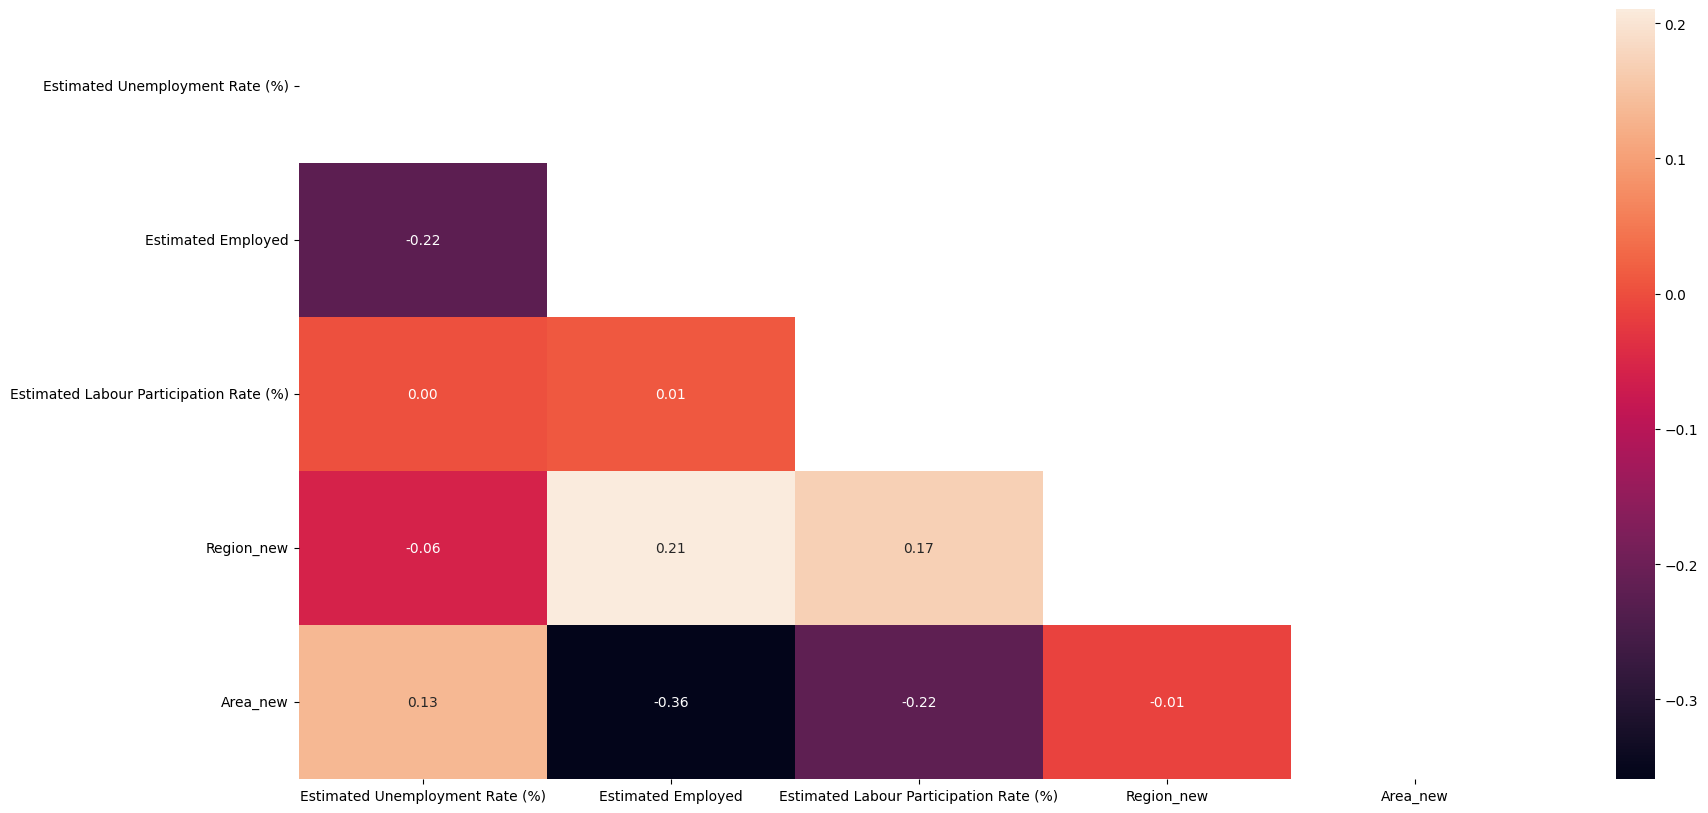

In [78]:
#PLOTTING THE HEAT MAP FOR CHECKING THE CORRELATIONSHIP % WITH EACH OTHER
mask=np.triu(corre)
plt.figure(figsize=(20,10))
sns.heatmap(corre,mask=mask,annot=True,fmt='.2f')
plt.show()

In [89]:
# SO FROM THE ABOVE TABLE WE SEE THAT NONE OF THE INDEPENDENT COLUMNS ARE DEPENDENT ON EAACH OTHER , SINCE ALL OF THEM HAVE %CORRELATION<0.5

In [90]:
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region_new', 'Area_new'],
      dtype='object')

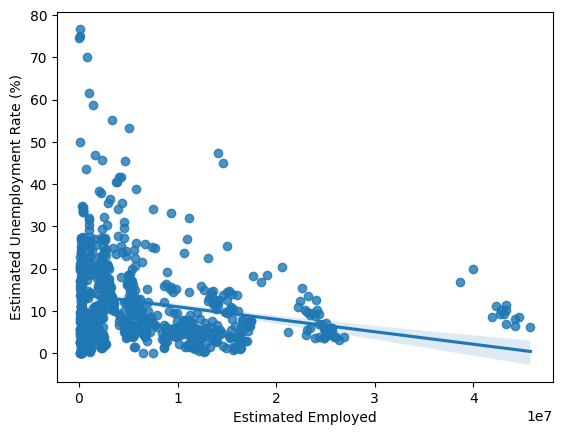

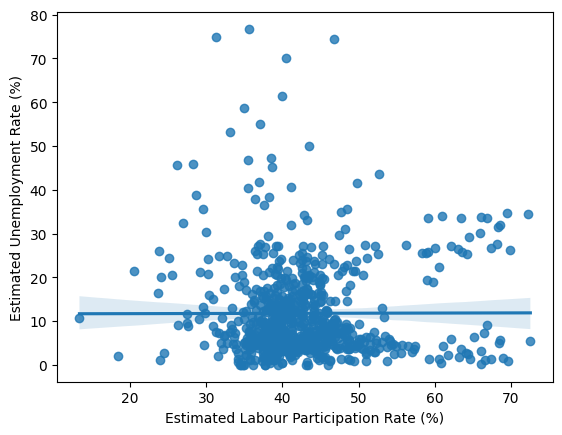

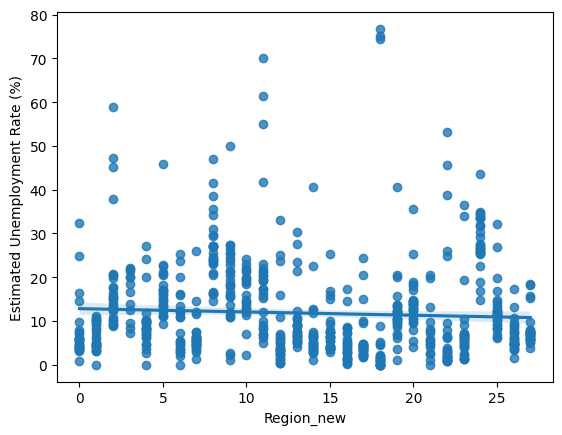

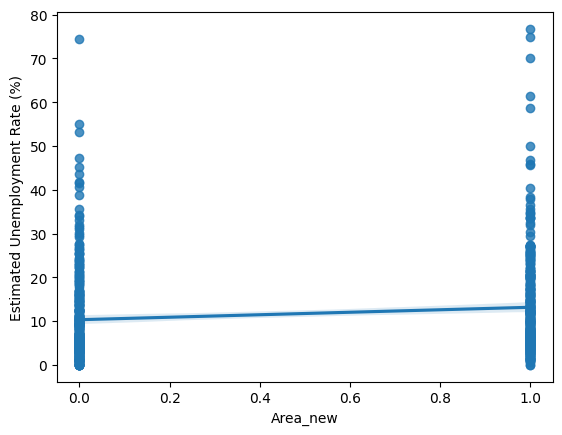

In [91]:
#STEP-4:VISUALISATION
#SCATTER PLOT TO SEE HOW THE DEPENDENT COLUMN CHANGES WITH INDEPENDENT COLUMNS.
#DEPENDENT COLUMN= "Estimated Unemployment Rate (%)"
columns=[ 'Estimated Employed',
       'Estimated Labour Participation Rate (%)','Region_new','Area_new']
for col in columns:
    sns.regplot(x=df[col],y=df["Estimated Unemployment Rate (%)"])
    plt.show()

In [ ]:
# SO FROM THE ABOVE VISUALISATION WE CAN INFER
#ESTIMATED UNEMPLOYED RATE (%) IS DEPENDENT ON "ESTIMATED EMPLOYED"-(NEGATIVELY)
#ESTIMATED UNEMPLOYED RATE (%) IS DEPENDENT ON "REGION NEW"-(NEGATIVELY) i.e.ANDHRA PRADESH HAS HIGHEST UNEMPLOYED RATE AND WESTBENGAL HAS LOWEST UNEMPLOYMENT RATE
#GRADUAALY IT DECREASES REGION WISE 
#ESTIMATED UNEMPLOYED RATE (%) IS DEPENDENT ON "AREA NEW"-(POSITIVELY) -i.e as it moves towards urban area unemployment rate increases.
#ESTIMATED UNEMPLOYED RATE (%) IS  NOT DEPENDENT ON "LABOUR PARTICIPATION RATE")




In [ ]:
#PLOT-2:G=HISTOGRAM PLOT-WHICH SHOWS THE DISTRIBUTION OF EACH DEPENDENT AND INDEPENDENT COLUMNS

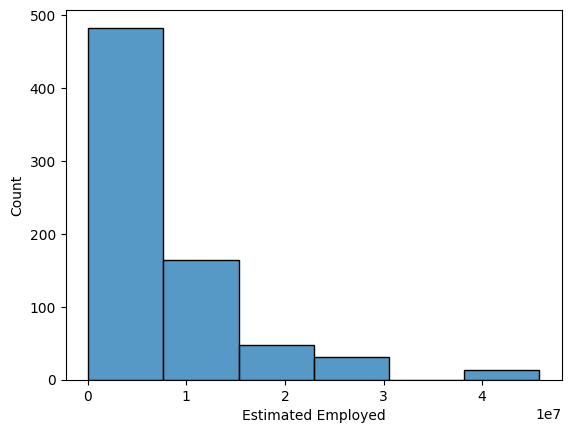

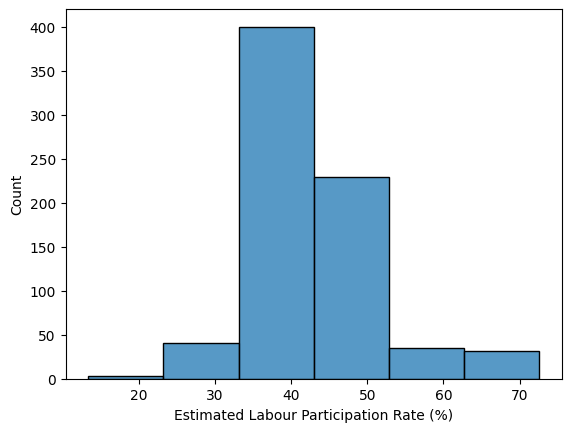

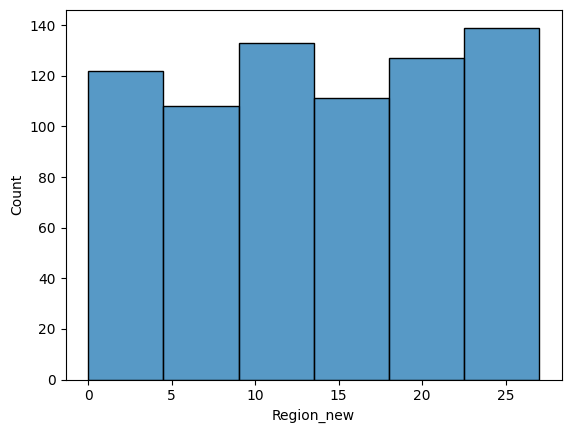

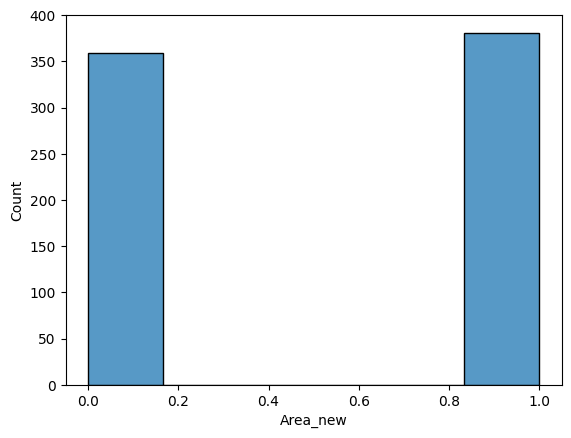

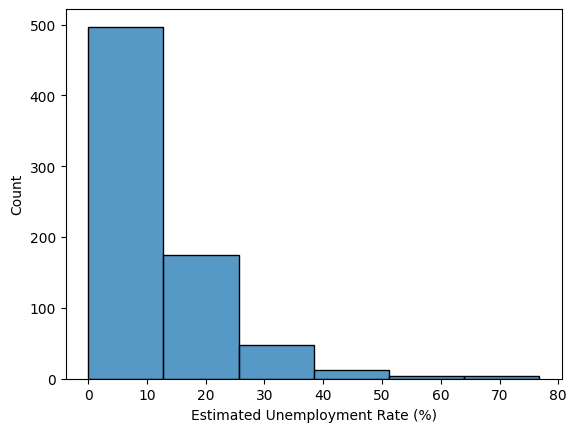

In [95]:
columns=['Estimated Employed',
       'Estimated Labour Participation Rate (%)','Region_new','Area_new','Estimated Unemployment Rate (%)']
for col in columns:
    sns.histplot(df[col],bins=6)
    plt.show()

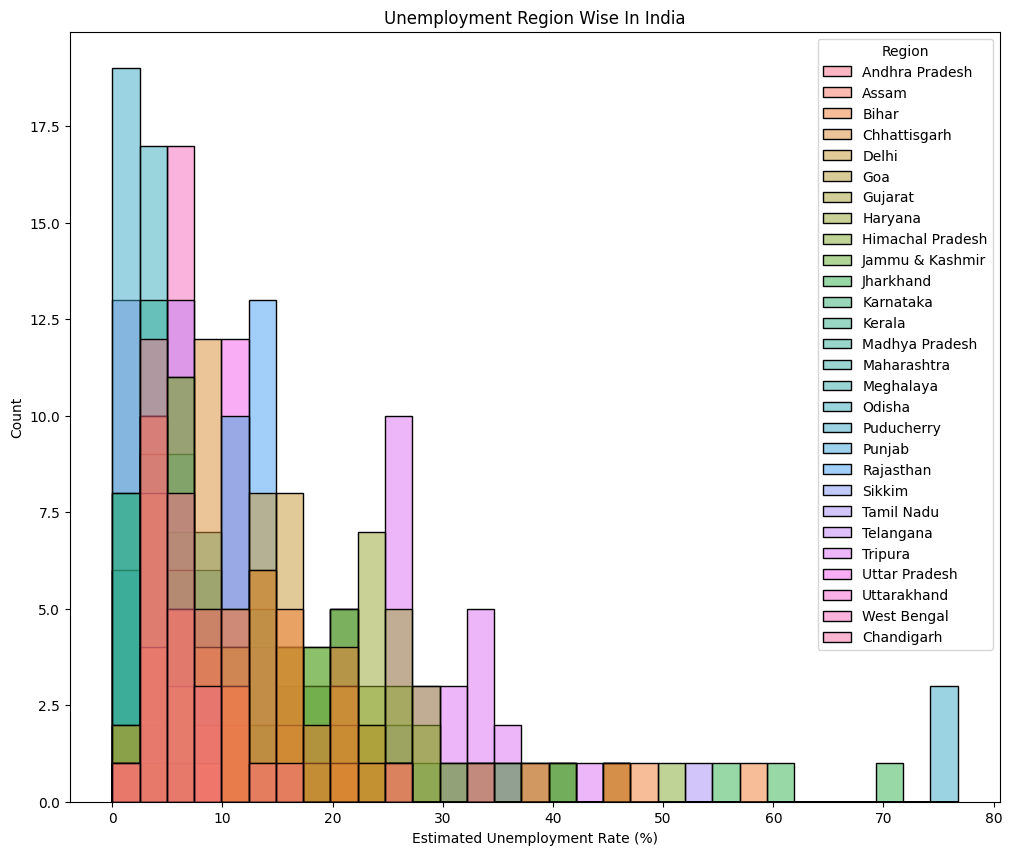

In [98]:
#PLOT3:THIS HISTOGRAM PLOT  ACTUALLY  SHOWS HOW THE UNEMPLOYMENT RATE CHANGES REGION WISE.
plt.figure(figsize=(12, 10))
plt.title("Unemployment Region Wise In India")
sns.histplot(x=df["Estimated Unemployment Rate (%)"], hue=df["Region"])
plt.show()